In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

!cp drive/MyDrive/Tensorflow/Project/OurTrainingData.zip OurTrainingData.zip
!cp drive/MyDrive/Tensorflow/Project/kaggle_train.csv  kaggle_train.csv  
!unzip OurTrainingData.zip

df = pd.read_csv("kaggle_train.csv")
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  OurTrainingData.zip
replace OurTrainingData/00021adfb725ed.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [ ]:
#@title Plotting Whales

columns=4
rows=4
fig = plt.figure(figsize=(20, 20))

def nicer_classes(name):
    name = name.replace("_", " ")
    name = name[0].capitalize() + name[1:]
    i = name.find(" ")
    return name[:i + 1] + name[i + 1].capitalize() + name[i + 2:]


for i in range(columns * rows):
      path, species, name = df.iloc[i]
      img = cv2.imread("OurTrainingData/" + path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      fig.add_subplot(rows, columns, i + 1)
      plt.title(f"{nicer_classes(species)}, {name}")
      plt.axis("off")
      plt.imshow(img)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.isnull().any()

image            False
species          False
individual_id    False
dtype: bool

In [ ]:
find_ending = np.vectorize(lambda x : x[x.find(".")+1:])
set(find_ending(df["image"].values))

{'jpg'}

In [ ]:
# create columns with counts 
df["species_counts"] = df.groupby('species')["species"].transform('count')
df['individum_count'] = df.groupby('individual_id')['individual_id'].transform('count')

# create int labels for species/individuals
int_labels = {name:id for id, name in enumerate(df["individual_id"].unique())}
df["label"]  = df["individual_id"].apply(lambda x: int_labels[x])

species_labels = {name:id for id, name in enumerate(df["species"].unique())}
df["species_label"]  = df["species"].apply(lambda x: species_labels[x])

indivium_counts = df["individum_count"].values
species_counts = df["species_counts"].values

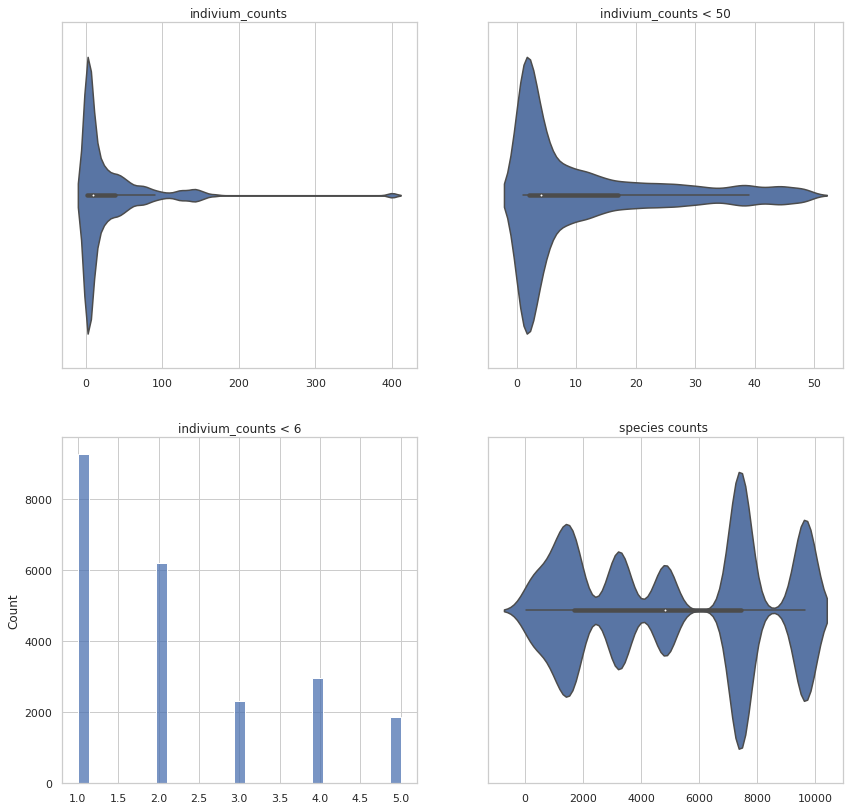




We have 9258 individuals with only one image.
9258 individuals corresponds to 59% of all individuals.
They make out 18% of the dataset.



We have 795 individuals with more then 10 images.
795 individuals corresponds to 5% of all individuals.
They make out 47% of the dataset.


In [ ]:
#@title Data Analysis

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,14))

sns.violinplot(x=indivium_counts[indivium_counts < 50],ax = ax[0,1])
ax[0,1].set_title("indivium_counts < 50")

sns.violinplot(x=indivium_counts,ax = ax[0,0])
ax[0,0].set_title("indivium_counts")
sns.histplot(x=indivium_counts[indivium_counts < 6],ax = ax[1,0])
ax[1,0].set_title("indivium_counts < 6")
sns.violinplot(x=species_counts,ax = ax[1,1])
ax[1,1].set_title("species counts ")
plt.show()

give_nice_percentage = lambda x, y: int(100 * np.round(x/y, 2))
number_of_indiviuals_with_one_image = (indivium_counts ==1).sum()
percentage_of_indiviuals_with_one_image =  give_nice_percentage(number_of_indiviuals_with_one_image,df["label"].max()+1)

their_amount_of_images = (indivium_counts ==1).sum()
percentage_data = give_nice_percentage(their_amount_of_images,len(indivium_counts))
print("\n\n")
print(f"""We have {number_of_indiviuals_with_one_image} individuals with only one image.
{number_of_indiviuals_with_one_image} individuals corresponds to {percentage_of_indiviuals_with_one_image }% of all individuals.
They make out {percentage_data}% of the dataset.""")

UPPER_LIMIT_OF_IMAGES = 10
counts = df.value_counts(["label"]).values
number_of_animals_above_limit= len(counts[counts >UPPER_LIMIT_OF_IMAGES])
percentage_of_animals_above_limit = give_nice_percentage(number_of_animals_above_limit,df["label"].max()+1)
their_amount_of_images = len(df[indivium_counts > UPPER_LIMIT_OF_IMAGES])
percentage_data = give_nice_percentage(their_amount_of_images,len(df))
print("\n\n")
print(f"""We have {number_of_animals_above_limit} individuals with more then {UPPER_LIMIT_OF_IMAGES} images.
{number_of_animals_above_limit} individuals corresponds to {percentage_of_animals_above_limit}% of all individuals.
They make out {percentage_data}% of the dataset.""")